# **Step 1: Import Libraries**

In [1]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import pickle

# **Step 2: Loading Dataset**

In [2]:
df = pd.read_csv('/content/Cdac_Customer_Churn.csv')


In [3]:
df.shape

(51072, 21)

# **Step 3: Explore the Dataset (EDA)**

In [4]:
print(df.head(5))



   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  7590-VHVEG    No  Female              0     Yes         No       1   
1  5575-GNVDE    No    Male              0      No         No      34   
2  3668-QPYBK   Yes    Male              0      No         No       2   
3  7795-CFOCW    No    Male              0      No         No      45   
4  9237-HQITU   Yes  Female              0      No         No       2   

  PhoneService     MultipleLines InternetService  ... OnlineBackup  \
0           No  No phone service             DSL  ...          Yes   
1          Yes                No             DSL  ...           No   
2          Yes                No             DSL  ...          Yes   
3           No  No phone service             DSL  ...           No   
4          Yes                No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Mo

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51072 entries, 0 to 51071
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        51072 non-null  object 
 1   Churn             51072 non-null  object 
 2   gender            51072 non-null  object 
 3   SeniorCitizen     51072 non-null  int64  
 4   Partner           51072 non-null  object 
 5   Dependents        51072 non-null  object 
 6   tenure            51072 non-null  int64  
 7   PhoneService      51072 non-null  object 
 8   MultipleLines     51072 non-null  object 
 9   InternetService   51072 non-null  object 
 10  OnlineSecurity    51072 non-null  object 
 11  OnlineBackup      51072 non-null  object 
 12  DeviceProtection  51072 non-null  object 
 13  TechSupport       51072 non-null  object 
 14  StreamingTV       51072 non-null  object 
 15  StreamingMovies   51072 non-null  object 
 16  Contract          51072 non-null  object

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,51072.000000,51072.000000,51071.000000
mean,0.163377,32.793723,66.940193
std,0.369713,24.614085,29.793726
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,41.675516
50%,0.000000,29.000000,69.950000
75%,0.000000,56.000000,92.040724
max,1.000000,72.000000,118.750000


In [7]:
print(df.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    1
PaymentMethod       1
MonthlyCharges      1
TotalCharges        1
dtype: int64


In [8]:
df.nunique()

,0
customerID,43072
Churn,2
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3


In [9]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.733122
Yes,0.266878


In [10]:
feature_names_cat = {}
for k in df.columns:
  if k not in ["customerID","tenure","TotalCharges","MonthlyCharges"]:
    feature_names_cat[k]=df[k].unique()
feature_names_cat

{'Churn': array(['No', 'Yes'], dtype=object),
 'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([0, 1]),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup': array(['Yes', 'No', 'No internet service'], dtype=object),
 'DeviceProtection': array(['No', 'Yes', 'No internet service'], dtype=object),
 'TechSupport': array(['No', 'Yes', 'No internet service'], dtype=object),
 'StreamingTV': array(['No', 'Yes', 'No internet service'], dtype=object),
 'StreamingMovies': array(['No', 'Yes', 'No internet service'], dtype=object),
 'Contract': array(['Month-to-month', 'One year', 'Two year', 'Mon'], dtype=object),
 'PaperlessBilling': arr

# **Step 4: Handling Missing Values**

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [12]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['TotalCharges'].isna().sum()

/tmp/ipython-input-2042411677.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


np.int64(0)

# **Step 5: Droping customerID (not useful for prediction)**

In [13]:
df.drop("customerID", axis=1, inplace=True)

# **Step 6: Converting 'Churn' to binary**

In [14]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [15]:
df.nunique()

,0
Churn,2
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


# **Step 7: Encoding Categorical Columns using get_dummies**

In [16]:
df = pd.get_dummies(df)

In [17]:
df

,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Mon,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,29.850000,29.85,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,0,34,56.950000,1889.50,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,1,0,2,53.850000,108.15,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,0,45,42.300000,1840.75,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,1,0,2,70.700000,151.65,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51067,0,0,1,48.450000,48.45,True,False,True,False,True,...,False,True,False,False,False,True,True,False,False,False
51068,0,0,17,55.350000,920.50,True,False,False,True,False,...,False,True,False,False,False,True,False,True,False,False
51069,0,0,72,29.873644,20.25,True,False,True,False,False,...,False,False,False,True,True,False,False,False,True,False
51070,0,1,72,110.100000,7746.70,True,False,True,False,True,...,False,False,False,True,False,True,True,False,False,False


#  **Step 8:** **Hypothesis Testing**

# **Testing that tenure differs significantly between churned and non-churned customers**

In [18]:

from scipy.stats import ttest_ind
group_yes = df[df['Churn'] == 'Yes']['tenure']
group_no = df[df['Churn'] == 'No']['tenure']

t_stat, p_val = ttest_ind(group_yes, group_no)

print("T-statistic:", t_stat)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Significant difference in tenure between churned and non-churned customers.")
else:
    print("Fail to reject the null hypothesis: No significant difference in tenure between churned and non-churned customers.")



T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant difference in tenure between churned and non-churned customers.


/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


## **Testing for MonthlyCharges numeric columns**

In [19]:
from scipy.stats import ttest_ind
group_yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
group_no = df[df['Churn'] == 'No']['MonthlyCharges']

t_stat, p_val = ttest_ind(group_yes, group_no)

print("T-statistic:", t_stat)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Significant difference in MonthlyCharges between churned and non-churned customers.")
else:
    print("Fail to reject the null hypothesis: No significant difference in MonthlyCharges between churned and non-churned customers.")


T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant difference in MonthlyCharges between churned and non-churned customers.



# **Testing for TotalCharges numeric columns**

In [20]:
from scipy.stats import ttest_ind
group_yes = df[df['Churn'] == 'Yes']['TotalCharges']
group_no = df[df['Churn'] == 'No']['TotalCharges']

t_stat, p_val = ttest_ind(group_yes, group_no)

print("T-statistic:", t_stat)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Significant difference in TotalCharges between churned and non-churned customers.")
else:
    print("Fail to reject the null hypothesis: No significant difference in TotalCharges between churned and non-churned customers.")


T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant difference in TotalCharges between churned and non-churned customers.


# **Step 9: Split features and target**

In [21]:
X = df.drop("Churn", axis=1)
y = df["Churn"]


# **Step 10: Spliting the data into train and test**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

# **Step 11: Apply Box-Cox to numerical columns (only positive values allowed)**
Applying Box-Cox to 'tenure', 'MonthlyCharges', 'TotalCharges'

In [23]:
pt = PowerTransformer(method='box-cox')
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    X[col] = X[col] + 1
X[['tenure', 'MonthlyCharges', 'TotalCharges']] = pt.fit_transform(X[['tenure', 'MonthlyCharges', 'TotalCharges']])


# **Step 12: Standardizing the Data**

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Step 13: Distribution of Churn (Bar Plot)**

Churn
0    37442
1    13630
Name: count, dtype: int64


/tmp/ipython-input-702700529.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


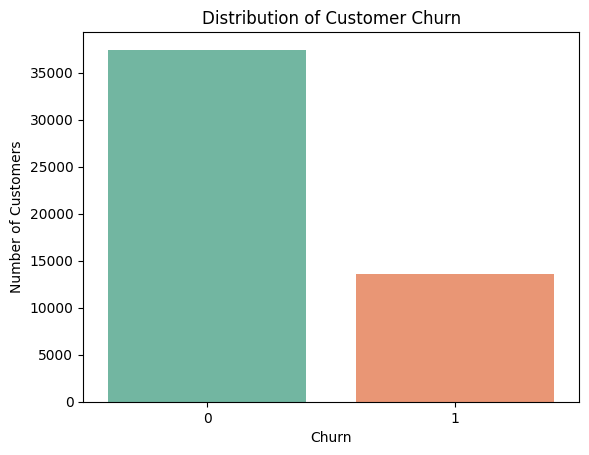

In [25]:
# Checking unique values in 'Churn' column
print(df['Churn'].value_counts())


# For Plot the distribution
sns.countplot(x='Churn', data=df, palette='Set2')

# Adding labels and title
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')

# Show plot
plt.show()


# **Step 14: Correlation Test**

In [26]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# **For Compute correlation matrix**

In [27]:

corr_matrix = numeric_df.corr()

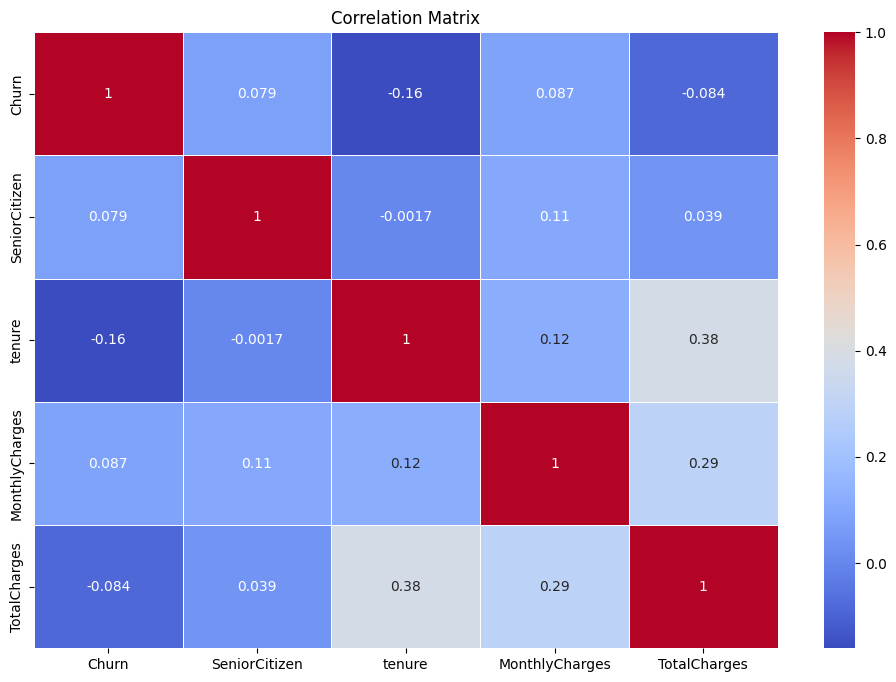

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# **Step 15: Boxplot vs Churn (Boxplot)**

/tmp/ipython-input-3678238160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='Set3')


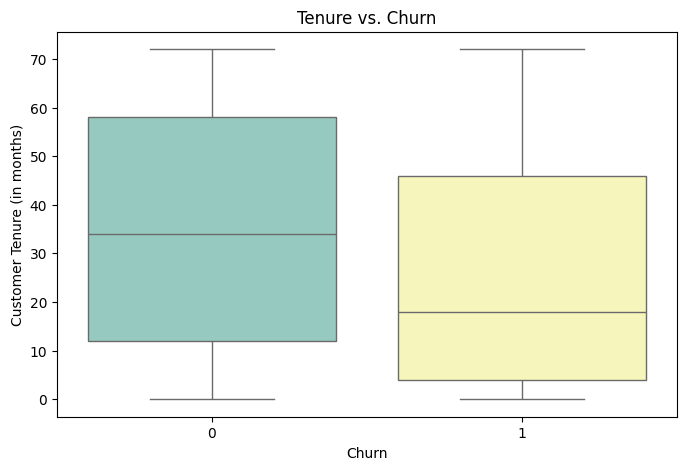

In [29]:
# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set3')

# Adding labels and title
plt.title('Tenure vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Tenure (in months)')

# Show the plot
plt.show()

# **Step 16: Synthetic Minority Oversampling Technique (SMOTE)**

In [30]:
smote = SMOTE(random_state=42)

In [31]:
# Drop rows with NaN values from X_train and corresponding y_train
X_train_smote, y_train_smote = smote.fit_resample(X_train[~np.isnan(X_train).any(axis=1)], y_train[~np.isnan(X_train).any(axis=1)])

In [32]:
print(y_train_smote.shape)

(59906,)


In [33]:
print(y_train_smote.value_counts())

Churn
0    29953
1    29953
Name: count, dtype: int64


# **Step 17: Train and Evaluate Models**


# **1. Logistic Regression**


In [34]:
lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)
lr_preds = lr.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lr_preds))
print("\nClassification Report:\n", classification_report(y_test, lr_preds))

Logistic Regression Results:
Accuracy: 0.6231032794909447

Confusion Matrix:
 [[4733 2756]
 [1094 1632]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.63      0.71      7489
           1       0.37      0.60      0.46      2726

    accuracy                           0.62     10215
   macro avg       0.59      0.62      0.58     10215
weighted avg       0.69      0.62      0.64     10215



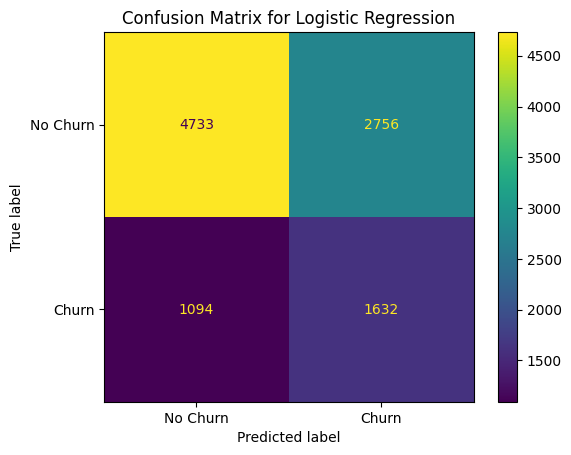

In [35]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, lr_preds), display_labels=['No Churn', 'Churn'])
cmd.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# **2. Decision Tree**

In [36]:
dt = DecisionTreeClassifier()
dt.fit(X_train_smote, y_train_smote)
dt_preds = dt.predict(X_test)
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, dt_preds))
print("\nClassification Report:\n", classification_report(y_test, dt_preds))

Decision Tree Results:
Accuracy: 0.9770925110132158

Confusion Matrix:
 [[7367  122]
 [ 112 2614]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      7489
           1       0.96      0.96      0.96      2726

    accuracy                           0.98     10215
   macro avg       0.97      0.97      0.97     10215
weighted avg       0.98      0.98      0.98     10215



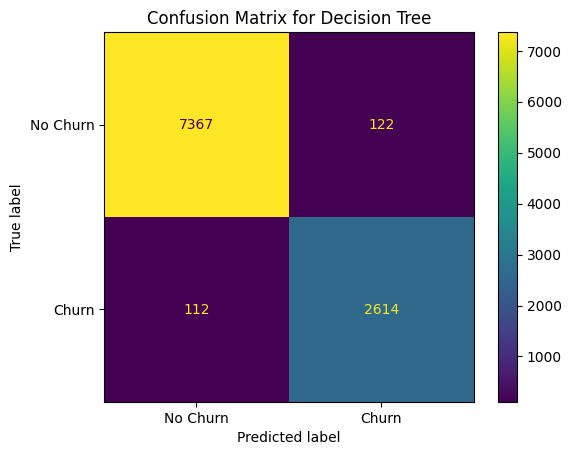

In [37]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, dt_preds), display_labels=['No Churn', 'Churn'])
cmd.plot()
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# **3. Random Forest**

In [38]:
rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)
rf_preds = rf.predict(X_test)
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))

Random Forest Results:
Accuracy: 0.9829662261380323

Confusion Matrix:
 [[7453   36]
 [ 138 2588]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7489
           1       0.99      0.95      0.97      2726

    accuracy                           0.98     10215
   macro avg       0.98      0.97      0.98     10215
weighted avg       0.98      0.98      0.98     10215



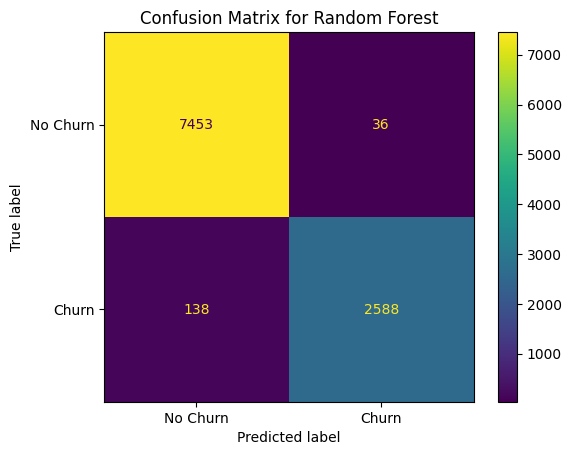

In [39]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, rf_preds), display_labels=['No Churn', 'Churn'])
cmd.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

# **4. XGBoost**

In [40]:
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)
xgb_preds = xgb_model.predict(X_test)
print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_preds))
print("\nClassification Report:\n", classification_report(y_test, xgb_preds))

XGBoost Results:
Accuracy: 0.8562897699461576

Confusion Matrix:
 [[6744  745]
 [ 723 2003]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      7489
           1       0.73      0.73      0.73      2726

    accuracy                           0.86     10215
   macro avg       0.82      0.82      0.82     10215
weighted avg       0.86      0.86      0.86     10215



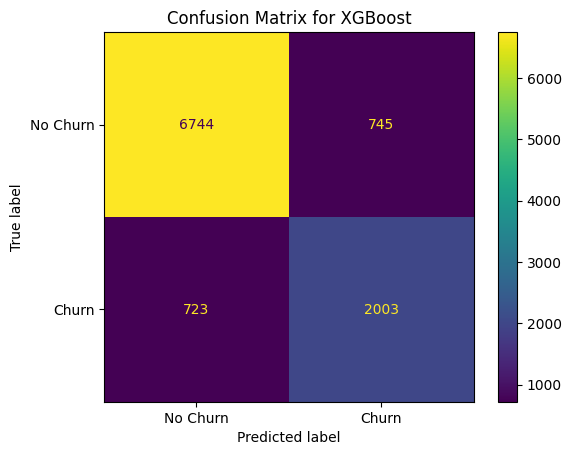

In [41]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, xgb_preds), display_labels=['No Churn', 'Churn'])
cmd.plot()
plt.title('Confusion Matrix for XGBoost')
plt.show()

# **Step 18: Confusion Matrix**

In [42]:
models = {'Logistic': lr_preds, 'Decision Tree': dt_preds, 'Random Forest': rf_preds, 'XGBoost': xgb_preds}
for name, preds in models.items():
    print(f"\n{name} Model")
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))


Logistic Model
[[4733 2756]
 [1094 1632]]
              precision    recall  f1-score   support

           0       0.81      0.63      0.71      7489
           1       0.37      0.60      0.46      2726

    accuracy                           0.62     10215
   macro avg       0.59      0.62      0.58     10215
weighted avg       0.69      0.62      0.64     10215


Decision Tree Model
[[7367  122]
 [ 112 2614]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7489
           1       0.96      0.96      0.96      2726

    accuracy                           0.98     10215
   macro avg       0.97      0.97      0.97     10215
weighted avg       0.98      0.98      0.98     10215


Random Forest Model
[[7453   36]
 [ 138 2588]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7489
           1       0.99      0.95      0.97      2726

    accuracy                           0.98

/tmp/ipython-input-3115985391.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


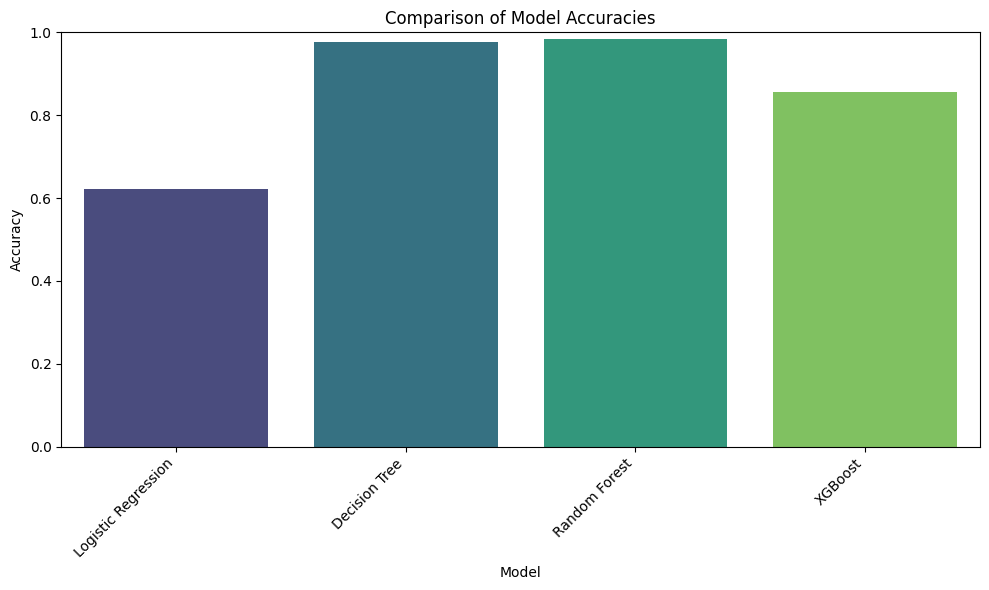

In [43]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy for each model
lr_accuracy = accuracy_score(y_test, lr_preds)
dt_accuracy = accuracy_score(y_test, dt_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)
xgb_accuracy = accuracy_score(y_test, xgb_preds)

# Store accuracies in a dictionary
model_accuracies = {
    'Logistic Regression': lr_accuracy,
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'XGBoost': xgb_accuracy
}

# Create a bar chart
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Step 19: Decision tree gives the highest accuracy compared to other models with default parameters**

In [44]:
dt = DecisionTreeClassifier(random_state=42)

In [45]:
dt.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

# **Step 20: Evaluating on Test Data**

In [46]:

y_test_pred = dt.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.9765051395007343
Confsuion Matrix:
 [[7361  128]
 [ 112 2614]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      7489
           1       0.95      0.96      0.96      2726

    accuracy                           0.98     10215
   macro avg       0.97      0.97      0.97     10215
weighted avg       0.98      0.98      0.98     10215



## **Step 21: Save the trained model as a pickle file**

In [47]:

model_data = {"model": dt, "features_names": X.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

# **Step 22: Load the saved model and build a Predictive System**

In [48]:
with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [49]:
print(loaded_model)

DecisionTreeClassifier(random_state=42)


In [50]:
print(feature_names)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Mon', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'Payme

In [51]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}


input_data_df = pd.DataFrame([input_data])

# Apply the same encoding as the training data
input_data_df = pd.get_dummies(input_data_df, drop_first=True)

# Ensure the columns match the training data columns
for col in feature_names:
  if col not in input_data_df.columns:
    input_data_df[col] = 0

input_data_df = input_data_df[feature_names]

# Apply the same scaling and transformation as the training data
# Note: We need to apply the transformations used during training.
# Assuming 'tenure', 'MonthlyCharges', 'TotalCharges' were the columns transformed by PowerTransformer and StandardScaler
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply PowerTransformer (assuming pt is still available from earlier execution)
for col in numerical_cols:
    input_data_df[col] = input_data_df[col] + 1 # Add 1 before applying box-cox
input_data_df[numerical_cols] = pt.transform(input_data_df[numerical_cols])

# Apply StandardScaler (assuming scaler is still available from earlier execution)
input_data_df = scaler.transform(input_data_df)


# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[0]
Prediction: No Churn
Prediciton Probability: [[1. 0.]]
